In [1]:
import os
import paddlehub as hub
import numpy as np

In [2]:
humanseg = hub.Module(name='deeplabv3p_xception65_humanseg')

[2022-05-21 10:20:44,213] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object


In [3]:
path = './data/'
files = os.listdir(path)
imgs = []

for i in files:
    imgs.append(path + i)

In [39]:
imgs

['./data/tumblr_ndyfnr7lk21tubinno1_1280.jpg',
 './data/tumblr_ndyfq386o41tubinno1_1280.jpg']

In [4]:
results = humanseg.segmentation(data={'image':imgs}, visualization=True)

In [5]:
results

[{'save_path': 'humanseg_output/tumblr_ndyfnr7lk21tubinno1_1280time=1653099647.png',
  'data': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)},
 {'save_path': 'humanseg_output/tumblr_ndyfq386o41tubinno1_1280time=1653099649.png',
  'data': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)}]

In [6]:
results[0]['data'].shape

(319, 500)

In [21]:
import cv2
import matplotlib.pyplot as plt

In [48]:
img = cv2.imread('./data/tumblr_ndyfnr7lk21tubinno1_1280.jpg')

(-0.5, 499.5, 318.5, -0.5)

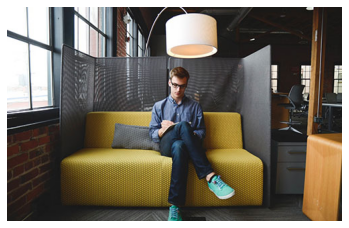

In [49]:
plt.imshow(img[:, :, ::-1])
plt.axis('off')

(-0.5, 499.5, 318.5, -0.5)

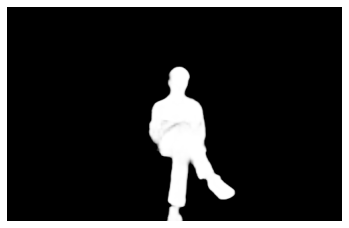

In [33]:

plt.imshow(results[0]['data'].astype(np.uint8), cmap='gray')
plt.axis('off')

In [30]:
new_img = img.copy()
mask_img = results[0]['data']

In [31]:
new_img[:, :, 0][mask_img == 0] = 255
new_img[:, :, 1][mask_img == 0] = 255
new_img[:, :, 2][mask_img == 0] = 255

(-0.5, 499.5, 318.5, -0.5)

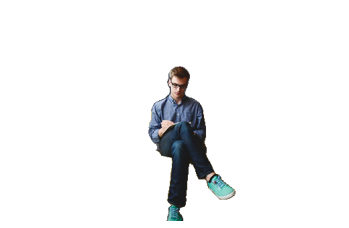

In [32]:
plt.imshow(new_img[:, :, ::-1])
plt.axis('off')

In [34]:
def file_list(listdir):
    im_list = []
    imgs = os.listdir(listdir)
    for img in imgs:
        im_list.append(os.path.join(listdir, img))
    return im_list
img_list = file_list('./video_seg/v2j/')